In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers
from scipy.stats import zscore

# Data Pre-processing
#ROC_AUC only handles binary 0,1 values. Using LabelBinarizer to convert y_test and y_pred
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#MultiOutput Regressor Model
from sklearn.multioutput import MultiOutputRegressor

# ML Algorithms
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
# https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us
# data taken from 06-22-2020.csv
df=pd.read_csv('COV19_22-06-2020.csv', parse_dates=['Last_Update'])
df.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-06-23 04:33:35,32.3182,-86.9023,30454,841,15974.0,13639.0,1,621.106485,349110.0,2471.0,2.761542,84000001,USA,7120.065835,8.113877
1,Alaska,US,2020-06-23 04:33:35,61.3707,-152.4044,758,12,491.0,255.0,2,103.616319,90824.0,NaN,1.583113,84000002,USA,12415.367476,NaN
2,American Samoa,US,2020-06-23 04:33:35,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,174.0,NaN,NaN,16,ASM,312.719038,NaN
3,Arizona,US,2020-06-23 04:33:35,33.7298,-111.4312,54599,1351,7581.0,45667.0,4,750.118462,429790.0,4185.0,2.474404,84000004,USA,5904.749422,7.664976
4,Arkansas,US,2020-06-23 04:33:35,34.9697,-92.3731,16083,227,10793.0,5063.0,5,532.937195,256339.0,1164.0,1.411428,84000005,USA,8494.222952,7.237456


In [3]:
df.shape

(58, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
Province_State          58 non-null object
Country_Region          58 non-null object
Last_Update             58 non-null datetime64[ns]
Lat                     56 non-null float64
Long_                   56 non-null float64
Confirmed               58 non-null int64
Deaths                  58 non-null int64
Recovered               46 non-null float64
Active                  58 non-null float64
FIPS                    58 non-null int64
Incident_Rate           56 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     36 non-null float64
Mortality_Rate          57 non-null float64
UID                     58 non-null int64
ISO3                    58 non-null object
Testing_Rate            56 non-null float64
Hospitalization_Rate    36 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(4), object(3)
memory usage: 8.3+ KB


Observations:
1. No missing values in Province_State, Country_Region, Last_Update, Confirmed, Deaths, Active, FIPS, UID, ISO3.
2. Four object dtypes
3. 58 rows with 18 columns
4. Need to understand more about ISO3, UID and FIPS to understand its part in the dataset

In [5]:
df.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,46.000000,58.000000,58.000000,56.000000,5.600000e+01,36.000000,57.000000,5.800000e+01,56.000000,36.000000
mean,36.840089,-85.206614,39867.275862,2075.896552,13917.347826,26753.482759,3288.086207,593.366127,4.920282e+05,6474.972222,3.937786,7.676194e+07,8194.026763,12.120362
std,10.887035,49.754449,62761.656383,4585.926403,18626.524809,50715.796049,17408.350591,458.509670,6.854400e+05,15012.777347,2.167281,2.378302e+07,3755.398945,4.270112
min,-14.271000,-170.132000,0.000000,0.000000,19.000000,0.000000,1.000000,0.000000,1.740000e+02,90.000000,0.000000,1.600000e+01,223.767031,6.472028
25%,34.594600,-101.165775,4581.500000,92.250000,1585.750000,821.500000,18.250000,262.990039,9.524825e+04,1034.250000,2.324177,8.400001e+07,5904.076146,8.526675
50%,39.061850,-87.944200,17934.500000,533.000000,5948.000000,8113.000000,32.500000,504.250809,2.881015e+05,2386.000000,3.437675,8.400003e+07,7888.044062,11.830276
75%,42.361650,-76.970625,49124.750000,2068.000000,16991.500000,22938.000000,47.750000,723.837956,5.731082e+05,6937.250000,5.319149,8.400004e+07,9527.459642,14.692264
max,61.370700,145.673900,388488.000000,31176.000000,69710.000000,287602.000000,99999.000000,1997.001988,3.452099e+06,89995.000000,9.311520,8.410000e+07,20641.499923,23.165452


Observations:
1. Many features have outliers.
2. Lat and Long_ consists of -ve values, which is normal.
3. FIPS range from 1 to 99999.
4. Min values for Deaths and Active are zero stating that we have cities that have not been affected by the pandemic.

In [6]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               12
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     22
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    22
dtype: int64

In [7]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print(df[i].describe())
    else:
        print(df[i].unique())

####### Province_State #######
count           58
unique          58
top       Arkansas
freq             1
Name: Province_State, dtype: object
####### Country_Region #######
['US']
####### Last_Update #######
['2020-06-23T04:33:35.000000000']
####### Lat #######
count    56.000000
mean     36.840089
std      10.887035
min     -14.271000
25%      34.594600
50%      39.061850
75%      42.361650
max      61.370700
Name: Lat, dtype: float64
####### Long_ #######
count     56.000000
mean     -85.206614
std       49.754449
min     -170.132000
25%     -101.165775
50%      -87.944200
75%      -76.970625
max      145.673900
Name: Long_, dtype: float64
####### Confirmed #######
count        58.000000
mean      39867.275862
std       62761.656383
min           0.000000
25%        4581.500000
50%       17934.500000
75%       49124.750000
max      388488.000000
Name: Confirmed, dtype: float64
####### Deaths #######
count       58.000000
mean      2075.896552
std       4585.926403
min          0.000

In [8]:
#Dropping Country_Region and Last_Update as they have only one value
df.drop(columns=['Country_Region', 'Last_Update', 'UID'], axis=1, inplace=True)

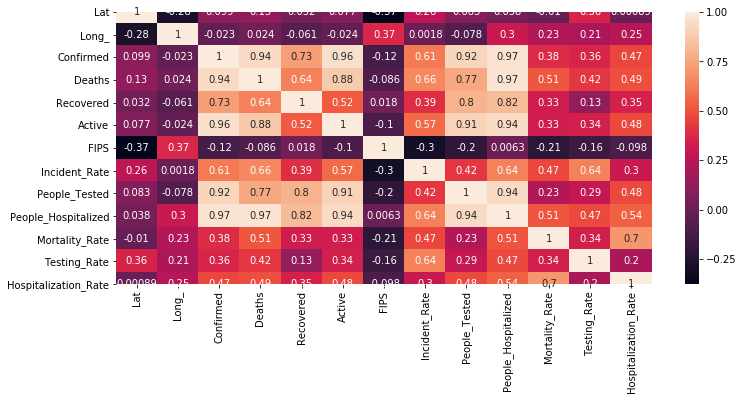

In [9]:
# Data Visulaization
# df.corr()
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True)

Observations:
1. Most features are highly correlated.
2. FIPS is the least correlated feature

In [10]:
df.columns

Index(['Province_State', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'FIPS', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

Skewness of Lat = -2.21
Skewness of Long_ = 3.51


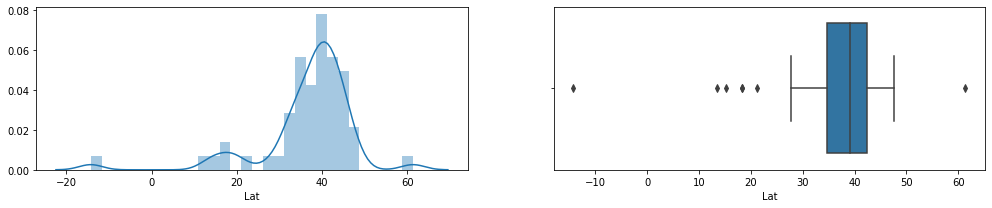

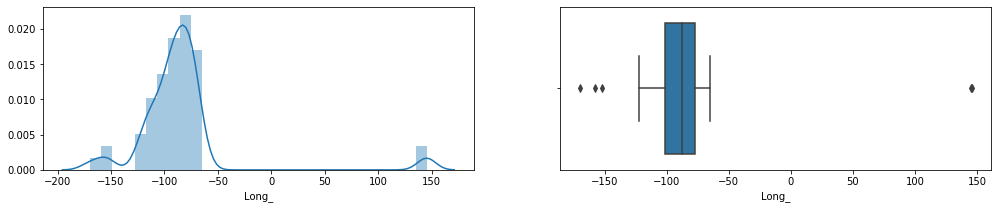

In [11]:
#Univariate analysis 'Lat' and 'Long_'
for i in ['Lat','Long_']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

Skewness of Confirmed = 3.56
Skewness of Deaths = 4.94
Skewness of Recovered = 1.85
Skewness of Active = 3.31


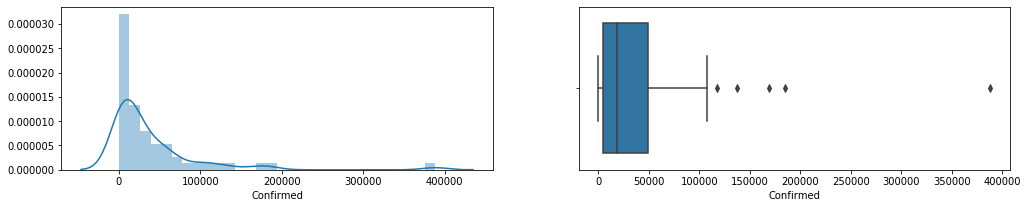

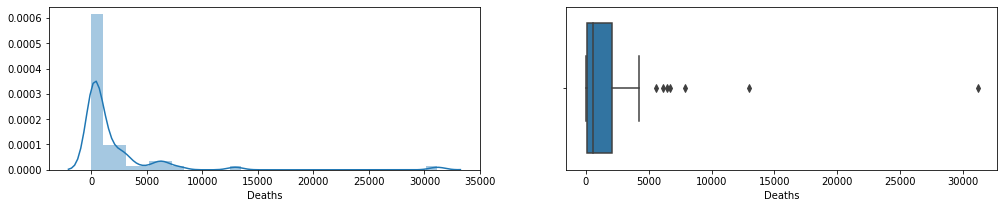

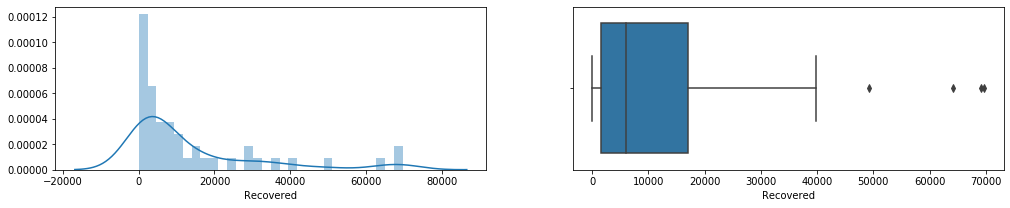

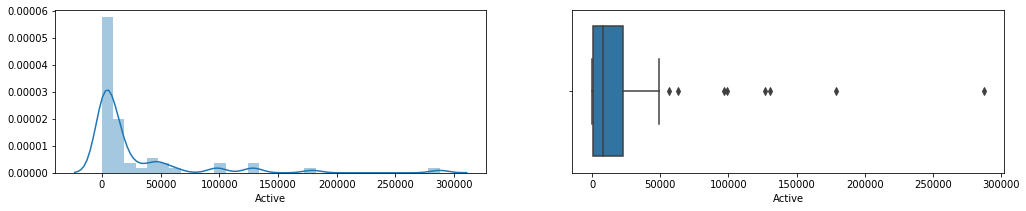

In [12]:
#Univariate analysis
for i in ['Confirmed','Deaths', 'Recovered', 'Active']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

FIPS and Province_State has unique values and need not be displayed over a univariate plot.

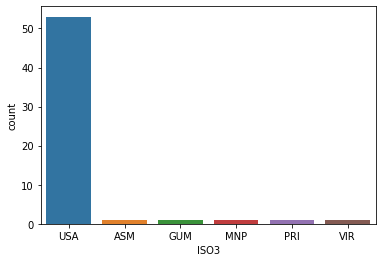

In [13]:
sns.countplot(x='ISO3', data=df)

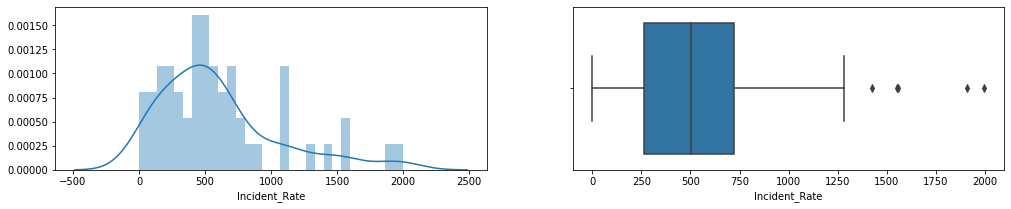

In [14]:
f=plt.figure(figsize=(17,3))
f.add_subplot(1,2,1)
sns.distplot(df['Incident_Rate'],bins=30)
f.add_subplot(1,2,2)
sns.boxplot(df['Incident_Rate'])

Skewness of People_Tested = 3.11
Skewness of Testing_Rate = 0.84


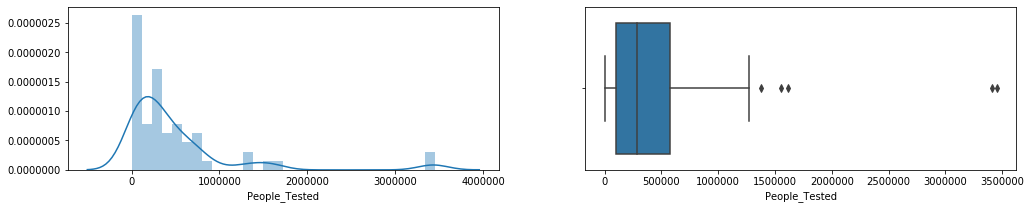

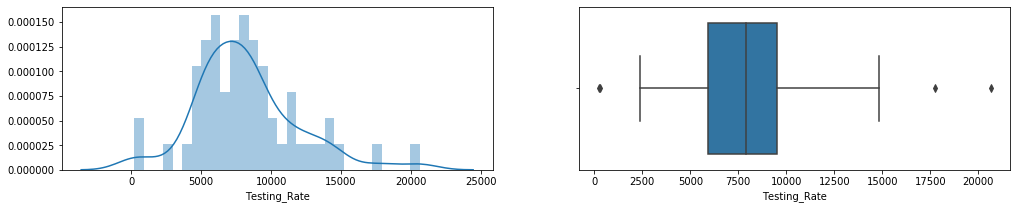

In [15]:
#Univariate analysis
for i in ['People_Tested','Testing_Rate']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

Skewness of People_Hospitalized = 5.20
Skewness of Hospitalization_Rate = 0.69


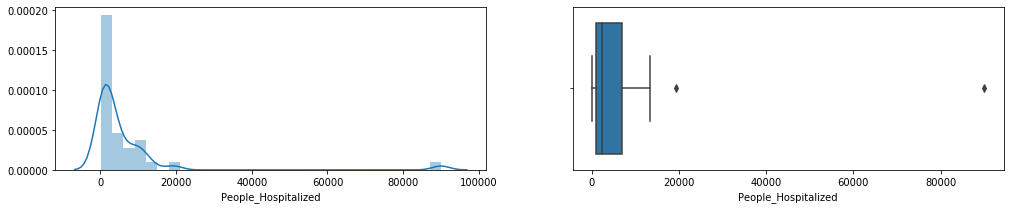

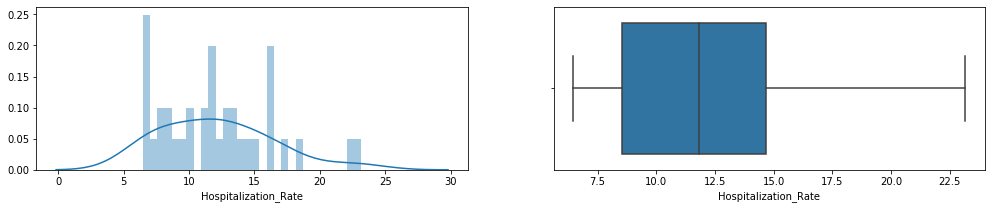

In [16]:
#Univariate analysis
for i in ['People_Hospitalized','Hospitalization_Rate']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

In [17]:
df[df['FIPS']<100].sort_values(by='FIPS', ascending=False).head(5)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
52,Virgin Islands,18.3358,-64.8963,76,6,64.0,6.0,78,70.850580,2578.0,NaN,7.894737,VIR,2403.326248,NaN
44,Puerto Rico,18.2208,-66.5901,6564,149,NaN,6415.0,72,223.767031,6564.0,NaN,2.269957,PRI,223.767031,NaN
39,Northern Mariana Islands,15.0979,145.6739,30,2,19.0,9.0,69,54.403018,8169.0,NaN,6.666667,MNP,14813.941680,NaN
14,Guam,13.4443,144.7937,222,5,173.0,44.0,66,135.177100,10404.0,NaN,2.252252,GUM,6335.056537,NaN
2,American Samoa,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,174.0,NaN,NaN,ASM,312.719038,NaN


In [18]:
# Since FIPS is a unique value assigned to each province_state, we can drop it.
df.drop(columns='FIPS', axis=1, inplace=True)

In [19]:
df[df['Deaths']>10000]

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
34,New Jersey,40.2989,-74.5210,169415,12974,29522.0,126919.0,1907.356181,1267399.0,19401.0,7.658118,USA,14268.992219,11.451760
36,New York,42.1657,-74.9481,388488,31176,69710.0,287602.0,1997.001988,3452099.0,89995.0,8.024958,USA,17745.332076,23.165452


We have two states with Deaths of above 10000 and they contribute a lot of other features to the dataset and hence, we will keep them.

In [20]:
df[df['People_Hospitalized']>40000]

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
36,New York,42.1657,-74.9481,388488,31176,69710.0,287602.0,1997.001988,3452099.0,89995.0,8.024958,USA,17745.332076,23.165452


It is very clear that New York has the highest number of Deaths and People_Hospitalized.

In [21]:
# Dealing with NULL Values
df.isnull().sum()

Province_State           0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               12
Active                   0
Incident_Rate            2
People_Tested            2
People_Hospitalized     22
Mortality_Rate           1
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    22
dtype: int64

In [22]:
df[df['Lat'].isna()]

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,NaN,NaN,49,0,NaN,49.0,NaN,NaN,NaN,0.000000,USA,NaN,NaN
13,Grand Princess,NaN,NaN,103,3,NaN,100.0,NaN,NaN,NaN,2.912621,USA,NaN,NaN


In [23]:
# 'Diamond Princess' and 'Grand Princess' has lot of missing values and we will have to drop them.
df.drop(axis=0, index=[9, 13], inplace=True)

In [24]:
df[df['Mortality_Rate'].isna()]

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,-14.271,-170.132,0,0,NaN,0.0,0.0,174.0,NaN,NaN,ASM,312.719038,NaN


In [25]:
# There are no confirmed cases nor deaths in American Samoa. We can replace Mortality_Rate with Zero.
df['Mortality_Rate'].fillna(0, inplace=True)
df['Mortality_Rate'].isna().sum()

0

In [26]:
# Let's deal with 'People_Hospitalized' and 'Hospitalization_Rate' as they are related.
df[(df['People_Hospitalized'].isna()) & (df['Hospitalization_Rate'].isna())].shape[0]

20

In [27]:
# Checking the # of rows where 'People_Hospitalized' is greater that 'Confirmed'
df[(df['People_Hospitalized']>df['Confirmed'])].shape[0]

0

1. In short, number of people hospitalized is never greater than number of confirmed cases. We can use this to our advantage to fill values in 'People_Hospitalized'.
2. Since 'Hospitalization_Rate' is directly dependent on 'People_Hospitalized', we can fill those values too.

In [28]:
# Replacing the rest of 'People_Hospitalized'==np.nan with mean of the column
m=df['People_Hospitalized'].mean()
print('Mean of People_Hospitalized = %0.2f' %(m))

# Relacing all 'People_Hospitalized'==np.nan to 0, where 'Confirmed' <= mean of People_Hospitalized
m_index=df[(df['Confirmed']<=m) & (df['People_Hospitalized'].isna())].index
print('# of rows replaced with Zero = ', len(m_index))

for i in list(m_index):
    df['People_Hospitalized'][i]=0
    df['Hospitalization_Rate'][i]=0
    
# Relacing all 'People_Hospitalized'==np.nan to m, where 'Confirmed' > mean of People_Hospitalized
m_index=df[(df['Confirmed']>m) & (df['People_Hospitalized'].isna())].index
print('# of rows replaced with mean = ', len(m_index))

for i in list(m_index):
    df['People_Hospitalized'][i]=int(m)
    df['Hospitalization_Rate'][i]=df['People_Hospitalized'][i]*100/df['Confirmed'][i]

Mean of People_Hospitalized = 6474.97
# of rows replaced with Zero =  7
# of rows replaced with mean =  13


'Recovered' = 'Confirmed' - 'Active' - 'Deaths'

In [29]:
# Filling missing values for 'Recovered'
m_index = df[df['Recovered'].isna()].index

for i in list(m_index):
    df['Recovered'][i]=df['Confirmed'][i]-df['Active'][i]-df['Deaths'][i]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 57
Data columns (total 14 columns):
Province_State          56 non-null object
Lat                     56 non-null float64
Long_                   56 non-null float64
Confirmed               56 non-null int64
Deaths                  56 non-null int64
Recovered               56 non-null float64
Active                  56 non-null float64
Incident_Rate           56 non-null float64
People_Tested           56 non-null float64
People_Hospitalized     56 non-null float64
Mortality_Rate          56 non-null float64
ISO3                    56 non-null object
Testing_Rate            56 non-null float64
Hospitalization_Rate    56 non-null float64
dtypes: float64(10), int64(2), object(2)
memory usage: 9.1+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF8E6C8>,
      dtype=object)

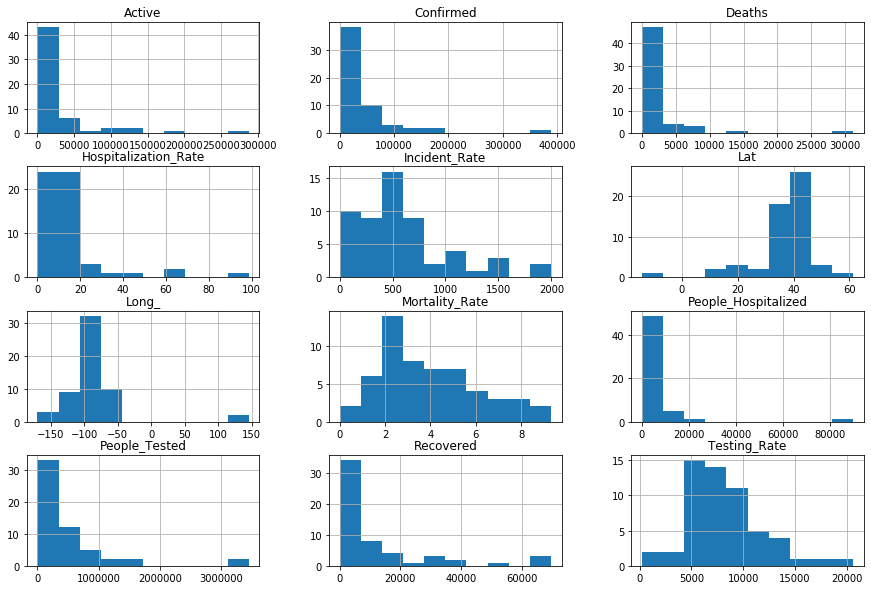

In [31]:
# Bivariate analysis
df.hist(figsize=(15,10))

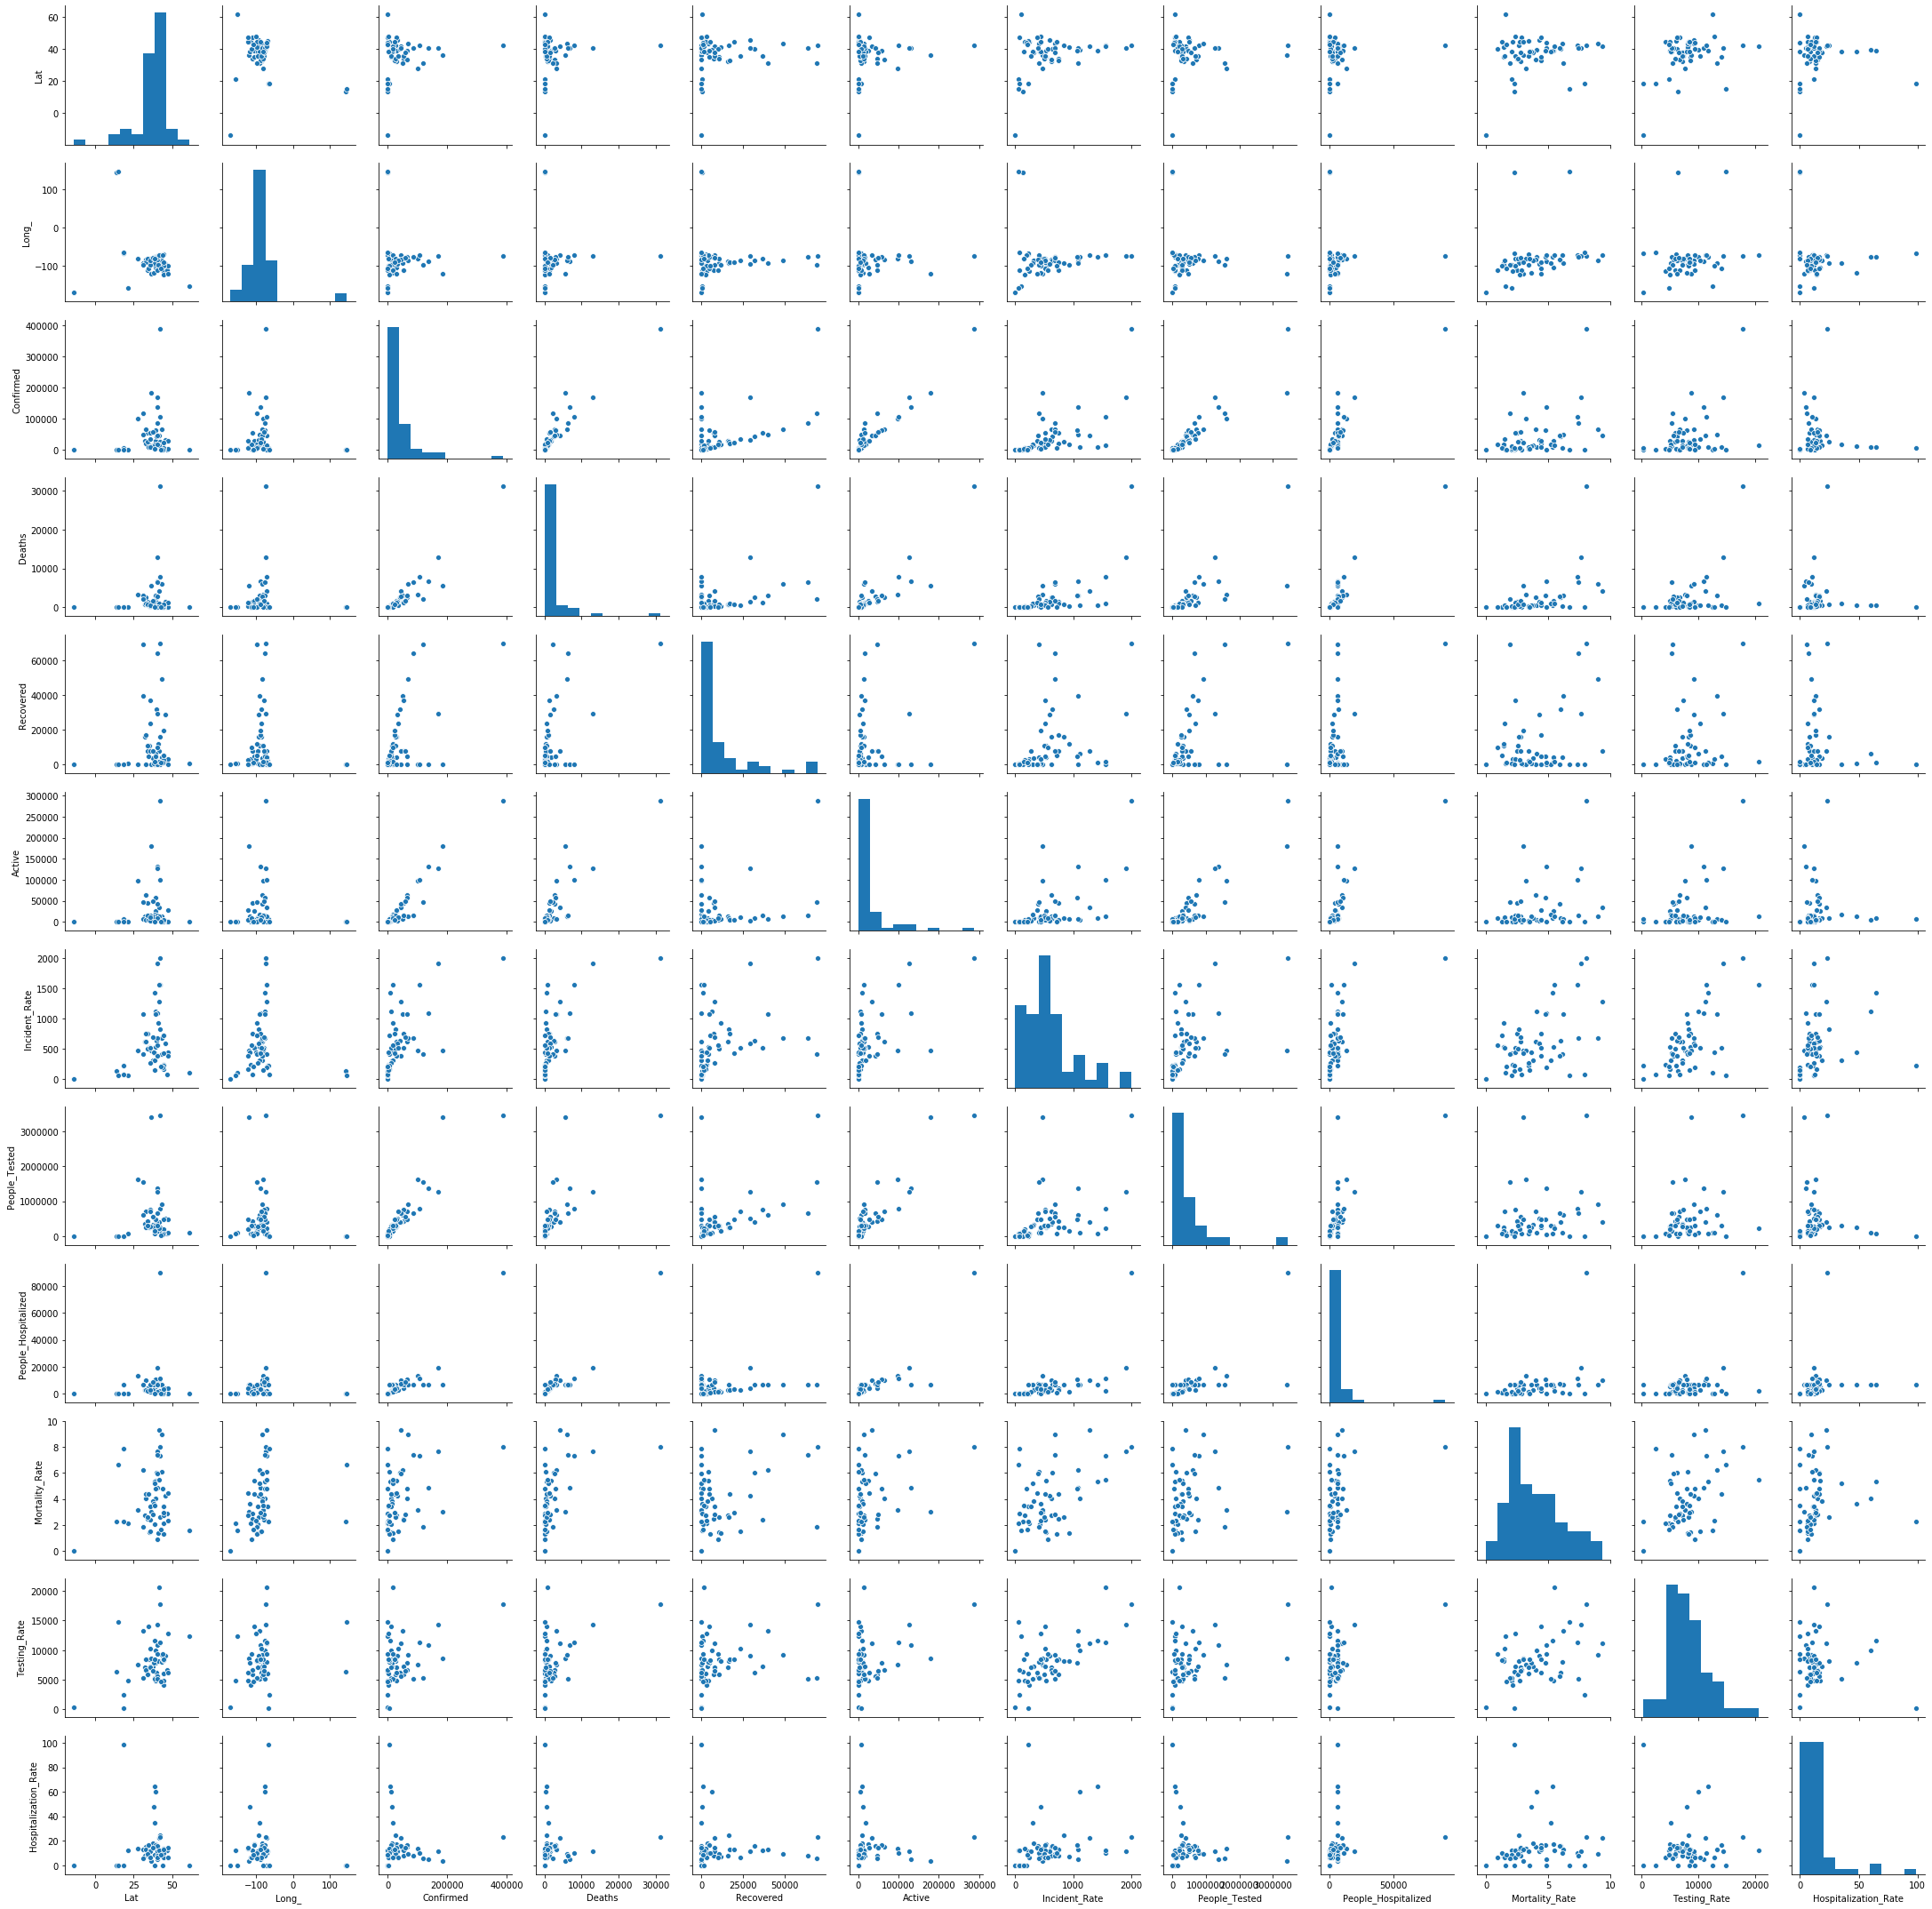

In [32]:
sns.pairplot(df)

In [33]:
df[df['ISO3']!='USA']

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,-14.2710,-170.1320,0,0,0.0,0.0,0.000000,174.0,0.0,0.000000,ASM,312.719038,0.000000
14,Guam,13.4443,144.7937,222,5,173.0,44.0,135.177100,10404.0,0.0,2.252252,GUM,6335.056537,0.000000
39,Northern Mariana Islands,15.0979,145.6739,30,2,19.0,9.0,54.403018,8169.0,0.0,6.666667,MNP,14813.941680,0.000000
44,Puerto Rico,18.2208,-66.5901,6564,149,0.0,6415.0,223.767031,6564.0,6474.0,2.269957,PRI,223.767031,98.628885
52,Virgin Islands,18.3358,-64.8963,76,6,64.0,6.0,70.850580,2578.0,0.0,7.894737,VIR,2403.326248,0.000000


1. We have only 1 datapoint for each of 'ASM', 'GUM', 'MNP', 'PRI' and 'VIR'. Don't see much use to have this on our dataset.
2. By removing these, we can drop ISO3 as they will only contain 'USA'

In [34]:
index=df[df['ISO3']!='USA'].index
df.drop(axis=0, index=index, inplace=True)
df.drop(columns='ISO3', axis=1, inplace=True)

In [35]:
df.sort_values(by='Deaths', ascending=False).head(10)

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
36,New York,42.1657,-74.9481,388488,31176,69710.0,287602.0,1997.001988,3452099.0,89995.0,8.024958,17745.332076,23.165452
34,New Jersey,40.2989,-74.5210,169415,12974,29522.0,126919.0,1907.356181,1267399.0,19401.0,7.658118,14268.992219,11.451760
25,Massachusetts,42.2302,-71.5301,107210,7873,0.0,99337.0,1555.458155,780063.0,11094.0,7.343531,11317.557642,10.347915
17,Illinois,40.3495,-88.9861,137224,6671,0.0,130553.0,1082.906711,1380003.0,6474.0,4.861395,10890.329022,4.717834
43,Pennsylvania,40.5908,-77.2098,86576,6426,64105.0,16045.0,676.269914,667848.0,6474.0,7.422380,5216.751866,7.477823
26,Michigan,43.3266,-84.5361,67957,6097,49290.0,12570.0,680.464334,918017.0,6474.0,8.971850,9192.251376,9.526612
5,California,36.1162,-119.6816,184765,5566,0.0,179199.0,467.614794,3411686.0,6474.0,3.012475,8634.507858,3.503910
7,Connecticut,41.5978,-72.7554,45782,4263,7842.0,33677.0,1284.104197,397552.0,10099.0,9.311520,11150.631071,22.058888
11,Florida,27.7663,-81.6868,100217,3173,0.0,97044.0,466.608749,1617487.0,13407.0,3.166129,7530.993605,13.377970
22,Louisiana,31.1695,-91.8678,50239,3117,39792.0,7330.0,1080.688884,618064.0,6474.0,6.204343,13295.147085,12.886403


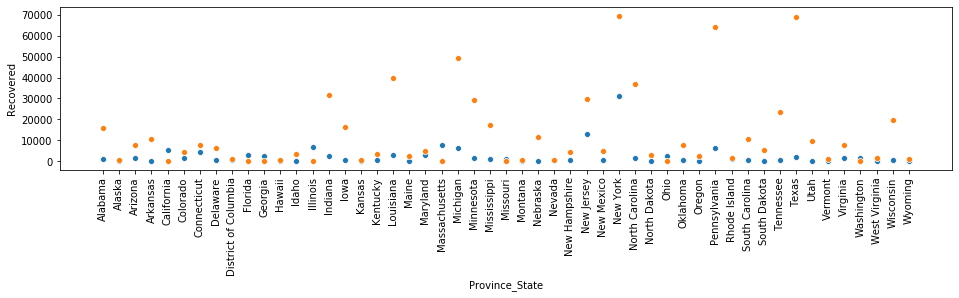

In [36]:
plt.figure(figsize=(16,3))
plt.xticks(rotation='vertical')
sns.scatterplot(x='Province_State',y='Deaths',data=df)
sns.scatterplot(x='Province_State',y='Recovered',data=df)

In [37]:
df.drop(columns=['Lat', 'Long_'], axis=1, inplace=True)

In [38]:
print(df.columns)
print(df.shape)

Index(['Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Incident_Rate', 'People_Tested', 'People_Hospitalized',
       'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')
(51, 11)


In [39]:
df.index=range(0,51)

In [40]:
x=df.drop(columns=['Deaths', 'Recovered'], axis=1)
y=pd.concat([df['Deaths'], df['Recovered']], axis=1)

In [41]:
# Instantiate LabelBinarizer
en=LabelBinarizer()
data=en.fit_transform(pd.DataFrame(x['Province_State']))

In [42]:
X=pd.concat([pd.DataFrame(data),x], axis=1)
x=X.drop(columns='Province_State', axis=1)

In [43]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

# Machine Learning Algorithms

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape: ',x_train.shape,'x_test.shape: ',x_test.shape,'\ny_train.shape',y_train.shape,'y_test.shape',y_test.shape)

x_train.shape:  (40, 59) x_test.shape:  (11, 59) 
y_train.shape (40, 2) y_test.shape (11, 2)


In [45]:
#Creating function for Model Training
def models(model, x_train, x_test, y_train, y_test,score):
    #Fit the algorithm on the data
    model.fit(x_train, y_train)
    
    #Predict training set:
    y_pred = model.predict(x_test)
    
    score.append(model.score(x_train,y_train)*100)
    print('\nModel Report')
    print('Score: %0.2f' %(model.score(x_train,y_train)))

In [46]:
model_name,score=[],[]

In [47]:
#Linear Regression
lreg=LinearRegression()
models(lreg,x_train,x_test,y_train,y_test,score)
model_name.append('Linear Regression')


Model Report
Score: 1.00


In [48]:
#K-Neighbors Regressor
knr=KNeighborsRegressor()
mor_knr=MultiOutputRegressor(knr)
models(mor_knr,x_train,x_test,y_train,y_test,score)
model_name.append('K-Neighbors Regressor')


Model Report
Score: 0.69


In [49]:
#Ridge Regression
parameters={'alpha':[0.01,1,100]}
best=GridSearchCV(Ridge(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 0.01}

In [50]:
rr=Ridge(alpha=0.01)
models(rr,x_train, x_test, y_train, y_test,score)
model_name.append('Ridge Regression')


Model Report
Score: 1.00


In [51]:
#Lasso Regression
parameters={'alpha':[0.001,0.01,1]}
best=GridSearchCV(Lasso(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1}

In [52]:
lr=Lasso(alpha=1)
models(lr,x_train, x_test, y_train, y_test,score)
model_name.append('Lasso Regression')


Model Report
Score: 1.00


In [53]:
#Elastic Net
enr=ElasticNet(alpha=0.01)
models(enr,x_train, x_test, y_train, y_test,score)
model_name.append('Elastic Net')


Model Report
Score: 1.00


In [54]:
#Support Vector Regression
svr=SVR()
mor_svr=MultiOutputRegressor(svr)
models(mor_svr,x_train, x_test, y_train, y_test,score)
model_name.append('Support Vector Regression')


Model Report
Score: -0.19


In [55]:
#Decision Tree Regressor
parameters={'max_depth':[8,10,12,15],'min_samples_leaf':[100,150]}
best=GridSearchCV(DecisionTreeRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 8, 'min_samples_leaf': 100}

In [56]:
dct=DecisionTreeRegressor(max_depth=8,min_samples_leaf=100)
models(dct,x_train, x_test, y_train, y_test,score)
model_name.append('Decision Tree Regression')


Model Report
Score: 0.00


In [57]:
#Random Forest Regressor
parameters={'n_estimators':[200,300,400],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 6, 'n_estimators': 400}

In [58]:
rf=RandomForestRegressor(n_estimators=200,max_depth=6)
models(rf,x_train, x_test, y_train, y_test,score)
model_name.append('Random Forest Regression')


Model Report
Score: 0.88


In [59]:
final=pd.DataFrame({'Model Name':model_name,'Score':score})
final

,Model Name,Score
0,Linear Regression,1.000000e+02
1,K-Neighbors Regressor,6.934576e+01
2,Ridge Regression,1.000000e+02
3,Lasso Regression,9.999963e+01
4,Elastic Net,9.999915e+01
5,Support Vector Regression,-1.915218e+01
6,Decision Tree Regression,1.110223e-14
7,Random Forest Regression,8.840492e+01


With Linear Regression & Ridge Regression, we were able to achieve 100% score for this dataset.

In [60]:
#Exporting model as pkl file
joblib.dump(lreg,'lreg_COVID19.pkl')

['lreg_COVID19.pkl']